<a href="https://colab.research.google.com/github/BernasconiLorenzo06/Python/blob/main/Pandas_groupby_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [69]:
df1 = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-20221119.csv')
df1

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,2022-11-19T17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,123235,NaN,ITF,ITF1,ITF11
1,2022-11-19T17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,143295,NaN,ITF,ITF1,ITF12
2,2022-11-19T17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,142547,NaN,ITF,ITF1,ITF13
3,2022-11-19T17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,171694,NaN,ITF,ITF1,ITF14
4,2022-11-19T17:00:00,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,12772,NaN,ITF,ITF1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2022-11-19T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,420955,NaN,ITH,ITH3,ITH35
145,2022-11-19T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,488071,NaN,ITH,ITH3,ITH36
146,2022-11-19T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,108879,NaN,ITH,ITH3,ITH37
147,2022-11-19T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,37545,NaN,ITH,ITH3,NaN


In [ ]:
#1 il numero di casi totali in Lombardia
df1[df1["denominazione_regione"] == "Lombardia"].sum()[["totale_casi"]]

In [ ]:
# 2 il numero di casi totali in ogni regione. Ordinare in ordine decrescente in base al numero di casi
dfCasiRegioni = df1.groupby("denominazione_regione").sum()[["totale_casi"]].sort_values(by=["totale_casi"],ascending = False).reset_index()
dfCasiRegioni

In [ ]:
# 3. le regioni che hanno più di un milione di casi
df1[df1["totale_casi"] > 1000000][["denominazione_regione"]]

In [46]:
#4. il numero di casi in Italia
dftotale=df1[df1["stato"]== "ITA"][["totale_casi"]].sum()
dftotale

totale_casi    24099206
dtype: int64

In [63]:
#5. la percentuale di casi in ogni regione rispetto al totale della popolazione italiana
percentuale = dfCasiRegioni/58000000*100
percentuale

,totale_casi
denominazione_regione,
Lombardia,6.701295
Veneto,4.305257
Campania,4.014917
Lazio,3.834538
Emilia-Romagna,3.460593
Sicilia,2.959919
Piemonte,2.809386
Puglia,2.657109
Toscana,2.593190


In [31]:
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 21 artists>

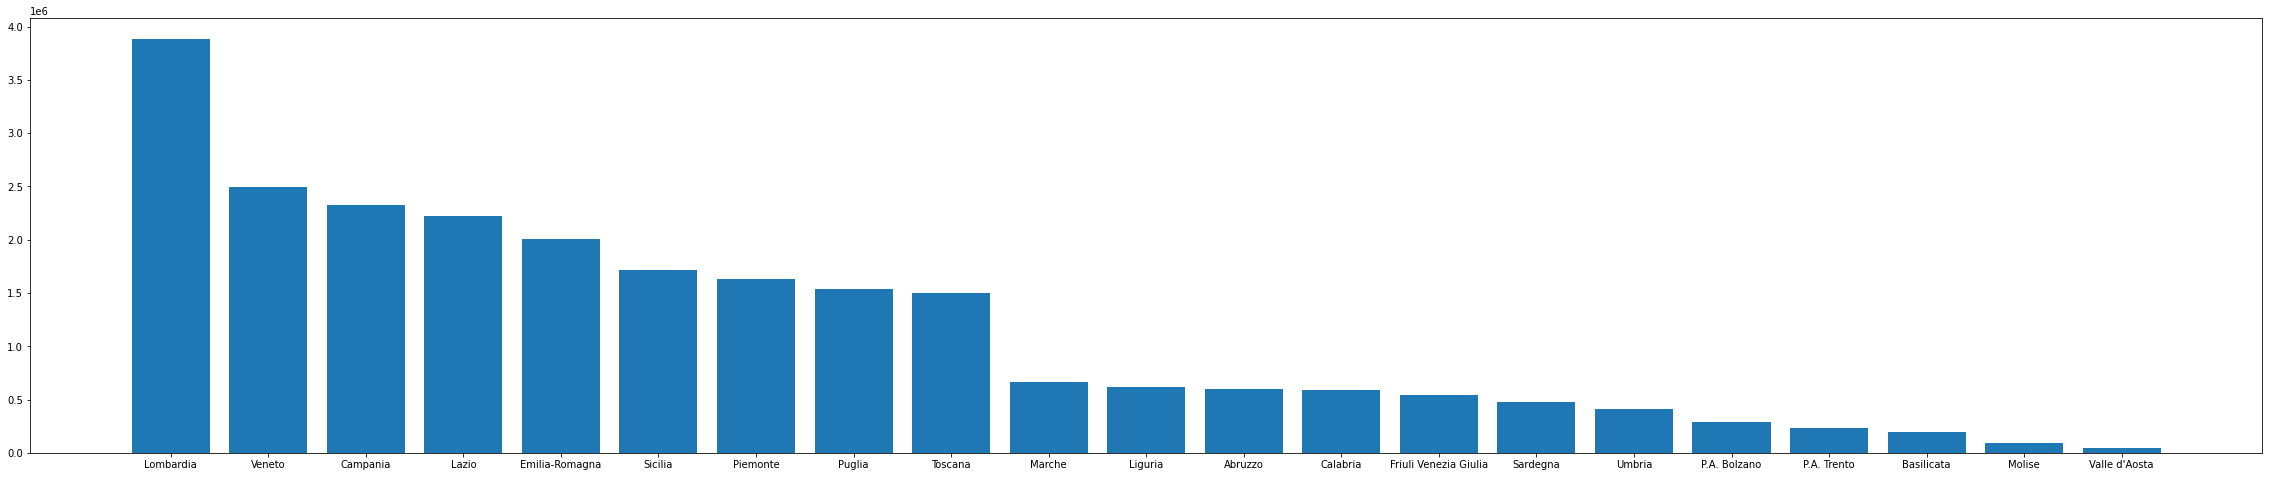

In [68]:
#1. un grafico a barre verticali per la richiesta numero 2

labels = dfCasiRegioni['denominazione_regione']
dati = dfCasiRegioni['totale_casi']

fig, ax = plt.subplots(figsize=(40,8))
ax.bar(labels, dati , label='totale casi in ogni regione')

In [ ]:
labels = dfCasiRegioni['denominazione_regione']
dati = dfCasiRegioni['totale_casi']

fig, ax = plt.subplots(figsize=(40,8))
ax.barh(labels, dati , label='totale casi in ogni regione')

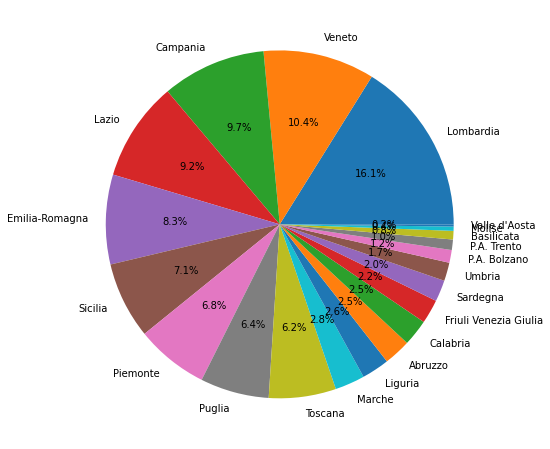

In [71]:
plt.figure(figsize=(16, 8))
plt.pie(dati, labels=labels, autopct='%1.1f%%')
plt.show()